In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp

sns.set_style('ticks')
sns.set_context('notebook')

In [40]:
# Define the ODE system

def ode_system(t, y, k1, k3, k4, k5, EC50, k_cat, K_M):
    y1, y2, y3, y4 = y

    y1_prime = k1 * y1 * (1 - y1 / k5) - y1 * y3
    y2_exp_term = (y2 / y1) * np.exp(k4 * t) if y1 < 1e-12 else 0 # prevent dividing by 0
    y2_prime = k3 * y2 * (1 - y2 / k5) - y2_exp_term - y2 * y3
    y3_prime = (5 * EC50**5 * y4) / (y4**6 * (EC50**5 / y4**5) + 1)**2
    y4_prime = k_cat * y1 * (1 - y1 / k5) * (y2 / (K_M + y2))

    return [y1_prime, y2_prime, y3_prime, y4_prime]

# Parameters

k1 = np.log(2)/8 #8 hour CTL doubling time after stimulation
k3 = np.log(2)/36 #36 h CTL death rate
k4 = 79.8 #CTL killing constant (1/h)
k5 = 8.4E6 #T75 carrying capacity
EC50 = 34.4 #EC50 of AMS on SET2 cells
k_cat = 9.716 #CPG2 turnover rate (1/h)
K_M = 7e3 #CPG2 michaelis constant

# Initial condition for E:T = 1:1
y0 = [1e4, 1e4, 1e-10, 1e-7]
t_span = (0, 100) # Time span for integration, from 0 to 100 hours

In [41]:
# Solve the ODE system
sol = solve_ivp(ode_system, t_span, y0, args=[k1, k3, k4, k5, EC50, k_cat, K_M], method='BDF', atol=1e-8, rtol=1e-8, dense_output=True)

# Print the solution at specific time points
time_points = np.linspace(t_span[0], t_span[1], 100)
y_solution = sol.sol(time_points)

Text(0.5, 0.98, 'SEAKER ODE System for E:T = 1:1')

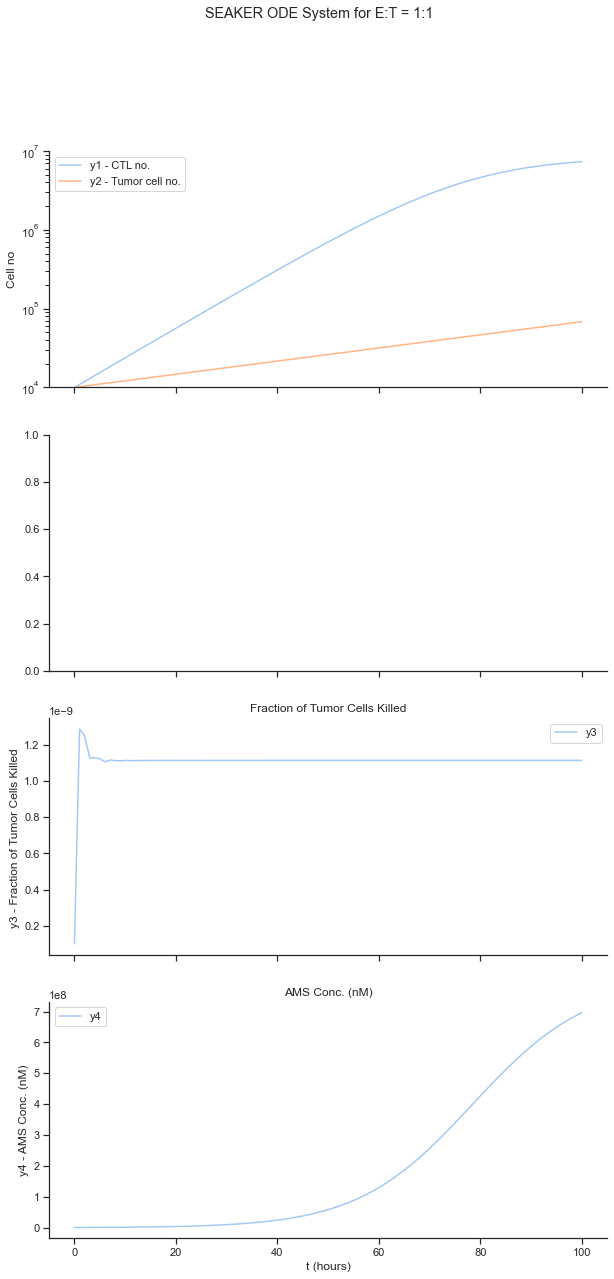

In [42]:
# Plot the results using subplots
fig, axes = plt.subplots(3, 1, figsize=(, 20), sharex=True)

sns.lineplot(x=time_points, y=y_solution[0], ax=axes[0], label='y1 - CTL no.')
axes[0].set_ylabel('Cell no')
#axes[0].set_title('CTL no.')

sns.lineplot(x=time_points, y=y_solution[1], ax=axes[0], label='y2 - Tumor cell no.')
#axes[1].set_title('Tumor cell no.')
axes[0].set_yscale('log')
axes[0].set_ylim(1E4, 1E7)

sns.lineplot(x=time_points, y=y_solution[2], ax=axes[1], label='y3')
axes[1].set_ylabel('y3 - Fraction of Tumor Cells Killed ')
axes[1].set_title('Fraction of Tumor Cells Killed')

sns.lineplot(x=time_points, y=y_solution[3], ax=axes[2], label='y4')
axes[2].set_ylabel('y4 - AMS Conc. (nM)')
axes[2].set_title('AMS Conc. (nM)')

sns.despine()

plt.xlabel('t (hours)')
plt.suptitle('SEAKER ODE System for E:T = 1:1')
#plt.savefig('SEAKER_ODE.png')